In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [85]:
df = pd.read_csv('df_clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59400 non-null  float64
 1   amount_tsh        59400 non-null  float64
 2   funder            59400 non-null  object 
 3   installer         59400 non-null  object 
 4   gps_height        59400 non-null  float64
 5   longitude         59400 non-null  float64
 6   latitude          59400 non-null  float64
 7   basin             59400 non-null  object 
 8   population        59400 non-null  float64
 9   permit            59400 non-null  object 
 10  extraction_type   59400 non-null  object 
 11  management        59400 non-null  object 
 12  management_group  59400 non-null  object 
 13  payment           59400 non-null  object 
 14  quality_group     59400 non-null  object 
 15  quantity          59400 non-null  object 
 16  source            59400 non-null  object

In [65]:
y = df['status_group']
X = df.drop('status_group', axis=1)

In [66]:
X_d = pd.get_dummies(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_d,y, test_size=0.25, random_state=42)

In [68]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
max(tree_clf.feature_importances_)

0.13637678449760998

In [70]:
pred = tree_clf.predict(X_test)

In [71]:
confusion_matrix(y_test,pred)

array([[6469,  461, 1168],
       [ 472,  397,  205],
       [1208,  223, 4247]])

In [72]:
classification_report(y_test,pred)

'                         precision    recall  f1-score   support\n\n             functional       0.79      0.80      0.80      8098\nfunctional needs repair       0.37      0.37      0.37      1074\n         non functional       0.76      0.75      0.75      5678\n\n               accuracy                           0.75     14850\n              macro avg       0.64      0.64      0.64     14850\n           weighted avg       0.75      0.75      0.75     14850\n'

In [73]:
accuracy_score(y_test,pred)

0.7483501683501683

In [74]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
forest.score(X_test,y_test)

0.6347474747474747

In [76]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

quantity_dry                0.089827
waterpoint_type_other       0.070492
quantity_enough             0.054409
extraction_type_other       0.054240
amount_tsh                  0.046076
                              ...   
installer_JBG               0.000000
installer_JAWABU            0.000000
installer_JAPAN EMBASSY     0.000000
installer_JAPAN             0.000000
installer_Billy Phillips    0.000000
Length: 4131, dtype: float64

In [80]:
top_30_features = feature_imp[0:30]

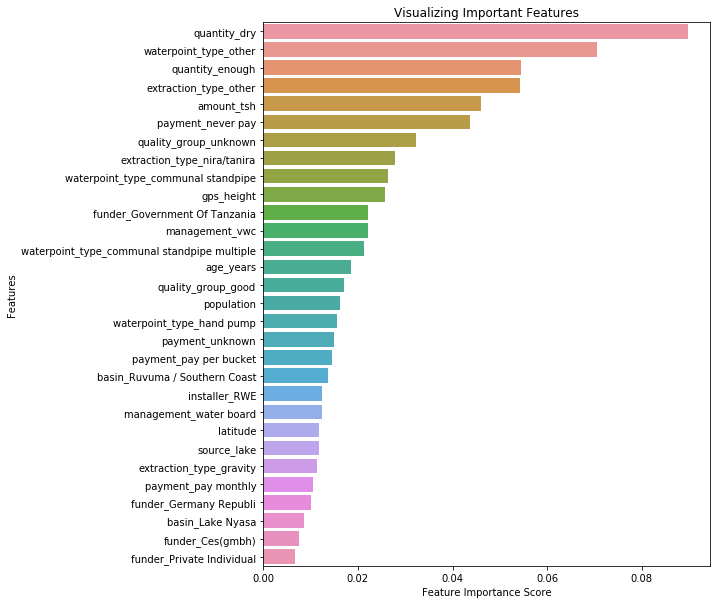

In [83]:
figure_1 = plt.figure(figsize=(8,10))
sns.barplot(x=top_30_features, y=top_30_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()